<b>Speech Recognition </b>

In [1]:
import os
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")

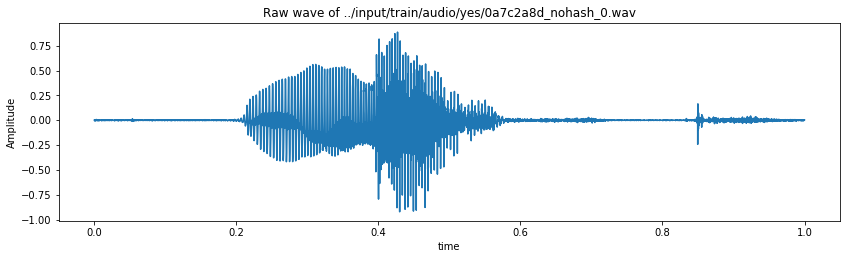

In [2]:
train_audio_path = 'data/mini_speech_commands'
samples, sample_rate = librosa.load(train_audio_path+'/left/0c2ca723_nohash_0.wav', sr = 8000)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + '../input/train/audio/yes/0a7c2a8d_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

In [3]:
ipd.Audio(samples, rate=sample_rate)
print(sample_rate)

8000


In [4]:
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples, rate=8000)

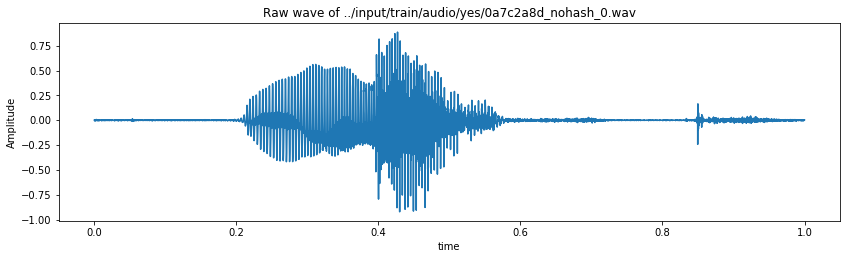

In [5]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + '../input/train/audio/yes/0a7c2a8d_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

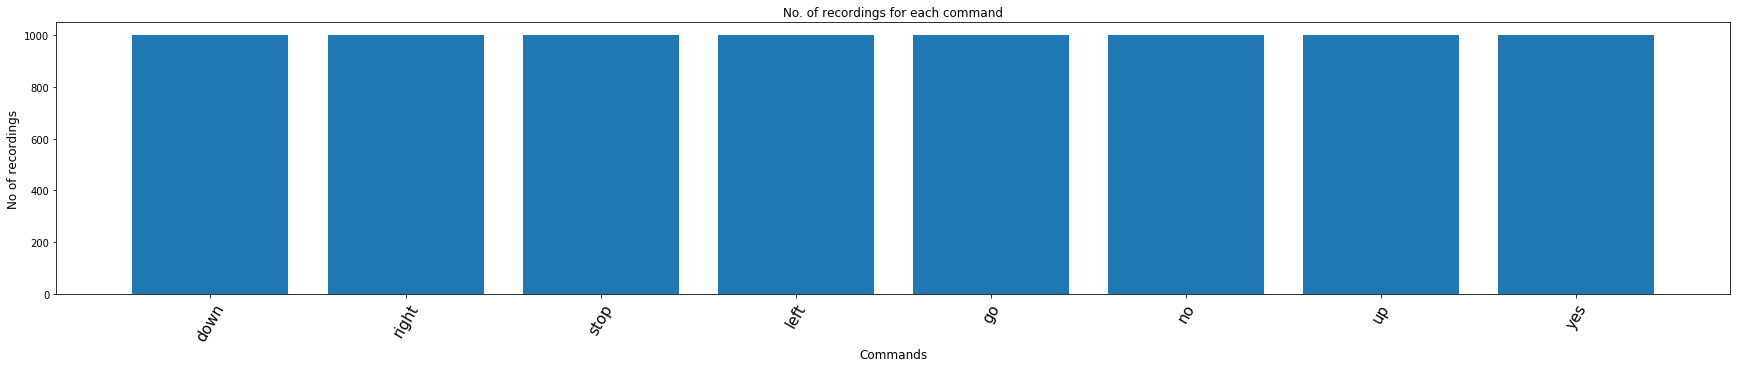

In [6]:
labels=os.listdir('data/mini_speech_commands')

#find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

labels=["left","right","up","down","no","yes","go"]

In [7]:
train_audio_path = 'data/mini_speech_commands'

all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

left
right
up
down
no
yes
go


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

In [9]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(labels))

In [10]:
all_wave = np.array(all_wave).reshape(-1,8000,1)

In [11]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)

(array([  15.,   12.,   12.,   28.,   80.,   64.,  116.,   85.,  189.,
        6399.]),
 array([0.4586875 , 0.51281875, 0.56695   , 0.62108125, 0.6752125 ,
        0.72934375, 0.783475  , 0.83760625, 0.8917375 , 0.94586875,
        1.        ]),
 <a list of 10 Patch objects>)

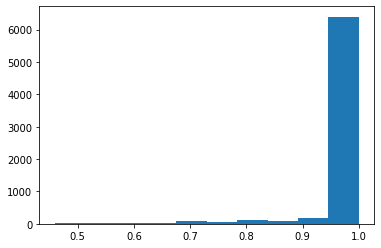

In [12]:
duration_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
    
plt.hist(np.array(duration_of_recordings))

In [13]:
train_audio_path = 'data/mini_speech_commands'

all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

left
right
up
down
no
yes
go


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

In [15]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(labels))

In [16]:
all_wave = np.array(all_wave).reshape(-1,8000,1)

In [17]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)

In [18]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8000, 1)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2662, 8)           0         
_________________________________________________________________
dropout (Dropout)            (None, 2662, 8)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2652, 16)          1424      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 884, 16)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 884, 16)           0     

In [19]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, mode='max')

In [21]:
history=model.fit(x_tr, y_tr ,epochs=30, callbacks=[es,mc], batch_size=32, validation_data=(x_val,y_val))

Epoch 1/30
157/157 [==============================] - 15s 94ms/step - loss: 1.9128 - accuracy: 0.1843 - val_loss: 1.8628 - val_accuracy: 0.2408

Epoch 00001: saving model to best_model.hdf5
Epoch 2/30
157/157 [==============================] - 15s 94ms/step - loss: 1.7249 - accuracy: 0.3246 - val_loss: 1.7000 - val_accuracy: 0.3317

Epoch 00002: saving model to best_model.hdf5
Epoch 3/30
157/157 [==============================] - 15s 94ms/step - loss: 1.5263 - accuracy: 0.4028 - val_loss: 1.4297 - val_accuracy: 0.4322

Epoch 00003: saving model to best_model.hdf5
Epoch 4/30
157/157 [==============================] - 15s 95ms/step - loss: 1.3534 - accuracy: 0.4718 - val_loss: 1.2560 - val_accuracy: 0.5183

Epoch 00004: saving model to best_model.hdf5
Epoch 5/30
157/157 [==============================] - 15s 95ms/step - loss: 1.2324 - accuracy: 0.5310 - val_loss: 1.1638 - val_accuracy: 0.5718

Epoch 00005: saving model to best_model.hdf5
Epoch 6/30
157/157 [==============================

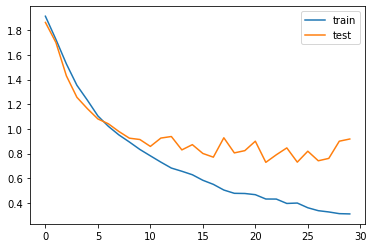

In [22]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend() 
pyplot.show()

In [23]:
from keras.models import load_model
model=load_model('best_model.hdf5')

In [24]:
def predict(audio):
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

In [25]:
import random
index=random.randint(0,len(x_val)-1)
samples=x_val[index].ravel()
print("Audio:",classes[np.argmax(y_val[index])])
ipd.Audio(samples, rate=8000)
print("Text:",predict(samples))

Audio: up
Text: right


In [34]:
import sounddevice as sd
import soundfile as sf

samplerate = 16000  
duration = 2# seconds
filename = 'yes.wav'
print("start")
mydata = sd.rec(int(samplerate * duration), samplerate=samplerate,
    channels=1, blocking=True)
print("end")
sd.wait()
sf.write(filename, mydata, samplerate)

start
end


In [42]:
os.listdir('data/mini_speech_commands/no')
filepath='data/mini_speech_commands/no'

#reading the voice commands
samples, sample_rate = librosa.load(filepath + '/' + '0b77ee66_nohash_0.wav', sr = 16000)
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples,rate=8000)  

predict(samples)

'no'